```{post} 2023-11-09
:author: Saul
```


# egglog

## Bringing e-graphs to Python

_Saul Shanabrook_


![PL - PyData - egglog handshake meme](https://i.imgflip.com/85gsif.jpg)

- PyData open source needs PL research to handle growing complexity
- PL research can have large impact by working with PyData open source


- Overview
  - Why pydata (scientific computing) and PL researchers need each other...
    - Python open source ecosystem around data, ML, scientific computing needs support of abstractions
    - PL can use this rich ecosystem to promote its ideas to larger audiences, make them accessible, have large impact, and use the real world problem to drive research goals
  - How a library for building e-graphs could help them come together


## Contributed to...

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" width="100px" > <img src="https://pbs.twimg.com/media/CvORVm4XEAI4bMV?format=png&name=small" width="100px" > <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Vega_Logo.svg/400px-Vega_Logo.svg.png" width="100px" >

## Worked at...

<img src="https://a.storyblok.com/f/152463/900x472/b289c484e3/qslabs-logo-opengraph-size.png" width="200px" align="center"> <img src="https://lever-client-logos.s3.us-west-2.amazonaws.com/4c9e45ad-c4d3-4684-adfd-82d53e437d9e-1651884428345.png" width="100px" align="center">

## Applying to Ph.D. programs in <br /> programming languages/formal methods.


- My background

  - Been working in open source python ecosystem 10 years
    - Slide with logos of projects
    - different communities, mainting projects
    - startups, consulting, grants
  - Applying to PhD programs in PL
  - My own journey, reflective of needs of community, what that can offer research
    - mutually beneficial collaboration


# First, some history....

<img src="moa.png" width="400px">


**[PYTHON MATRIX-SIG] Time for recap?**
_Fri, 29 Sep 1995_

How about separating out the representation and the structure?

I believe I've seen C/Fortran matrix packages that made quite good use of this. The representation would be a simple 1-dimensional sequence. You'd normally not see or use this, but it would be there if you needed access to it (e.g. for passing to C/Fortran code).

There's a simple way to map an index in an N-dim array into an index in the 1-dim representation array (Fortran compilers use it all the time :-).

To make efficient use of this, I propose that slicing and indexing, as long as they return an object of rank >= 1, return an object that points into the same representation sequence.

I propose one additional feature (which I believe I saw in Algol-68; some matrix packages may also use it): add a "stride" to each dimension (including the last). This makes it possible to have slices reference discontiguous parts of the underlying representation, and even to represent a transposed version!

If we do things just right, it may be possible to pass in the sequence to be used as the representation -- it could be a Python list, tuple or array (from the array module).

Again, all this can be prototyped in Python!

I would give an example, but I have to run.

--Guido van Rossum <guido@CNRI.Reston.VA.US>


- mixing the representation from the implementation
- Pointer, strides, dtype


_What is built on top of this?_

> The term “ecosystem” is often used to describe the modern open-source scientific software. In biology, the term “ecosystem” is defined as a biological community of interacting organisms and their physical environment. Modern open-source scientific software development occurs in a similarly interconnected and interoperable fashion.

[Jupyter Meets the Earth: Ecosystem](https://jupytearth.org/jupyter-resources/introduction/ecosystem.html)


- Why does Python need PL?
  - It's in jeopardy now... but to explain how first have to start with history
- History of Python open source
  - interdependent collection of projects
    - ecosystem
    - governed independently
      - Often Multi-stakeholder, from institutions or individuals
    - depend on one another
      - users will pull in multiple different projects to achieve their goals, that all work together
    - This is why its so powerful, someone already built the library and also that the whole ecosystem can function as one big solution
    - I love working in this space
      - room for collaboration from diverse individuals
      - values of transparency, openess, and collective good


## Python scientific computing ecosystem

![](https://jupytearth.org/_images/python-stack.png)


- Original where it took off

  - NumPy & SciPy
    - created by Travis Oliphant, who I worked with and serves as a mentor in this pace
    - Call out to C and Fortran routines
    - pointer in memory, metadata about shape and dtype
    - efficient, not have to leave python
  - Pandas, scikit learn, matplotlib built on top of this
    - common abstractions, allows users to take array from numpy, pass to scikit learn, then plot with matplotlib
    - efficient, no memory copies required, becuase all understand common format of numpy pointers at C level, or numpy API at python level
    - allows projects to be written by diverse people, innovation.


## How do we support todays targets?

<img src="./ecosystem-graph.png"  align="center">

_I made this four years ago, but gives a sense of some of the complexity_


- Different from today

  - changes in hardware
    - no longer single CPU
      - multicore
      - distributed accross many computers
    - heterogenous compute
      - GPU
      - TPU
      - ASICs
    - constantly changing as well, not fixed.


## Arrays are no longer a pointer to contigious memory and metadata...


- abstractions no longe rhold
  - pointer to array in memory + shape and type not sufficient as an interface between libraries
  - If I want to use pytorch deep learning TODO EXAMPLE THAT ISNT POSSIBLE WITH PYTORCH
  - memory might just be in CPU, might be on a GPU
    - what if its actually chunked across a number of CPUs?
  - also want to do whole program optimization, instead of going eagerly back and forth to compute and then to Python after every op, might want to analyze larger chunk of ops together and lower them


## How do we manage the new complexity?

Integrated frameworks funded by companies with 💸?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Google_JAX_logo.svg/1024px-Google_JAX_logo.svg.png" width="200px" align="center"> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/2560px-PyTorch_logo_black.svg.png" width="200px" align="center"> <img src="https://miro.medium.com/v2/resize:fit:1400/0*kXleHB9RbdRW26Uy.png" width="200px" align="center">


- More complex!
  - the workflows that manage this are often all encompassing, ala PyTorch, or TF/Jax, or even more so Mojo
    - Owned by single company!
      - PyTorch does have open gov, but all core maintainors are at meta
    - Mojo basically fork the whole language, with lots of $$$$
  - Users are locked into depending on these stacks, if you want to support the best performance
  - focus of these companies is more narrow than scientific computing, prioritize their profit centers, of AI
  - Many libraries are also re-implementing partial Python semantics
    - Jax, Numba, Tensorflow PyTorch...
    - to do whole program optimization must deal with parsing Python control flow
- Libraries dont work together as well
  - users end up having to choose one stack... incompatible with others
  - if they want to change, must rewrite code
  - if new hardware comes u that isnt covered, must rewrite
  - for example probabilistic programming, have to choose one
- Harder to have smaller isolated libraries that do only their strength
  - to do this write, you have to basically be a whole compiler
  - need to support lazy/eager
- This is a crisis! We need help! What exactly do we need help with?


_If we have tools to manage our complexity, can we have an ecosystem of interrelated DSLs and optimizations?_


- If we take a step back, we can see the ecosystem as a whole as one big compiler itself

  - But a ideosyncratic one with lots of mutually incompatible features
  - If they are part of large compiler, what if they didnt have to re-implement that every time?
    - by having careful ways of managing abstraction
  - So what if we lean into the idea of all of these different domains, instead of trying to build a monolothic framework/compiler to rule them all, what if instead we just make it easier for different libraries to write their own piece?
    - Hardware vendor: write just mapping from low level imperative domain to their hardware
    - Math array library: write array to hardware
    - End user: Target the domain they are familiar with
    - optimizations: could be added seperate
    - seperate of concerns
  - Looks much like the goals of MLIR, BUT
    - Python first
    - MLIR is imperative first, it says very little about the underlying semantics of any domain
    - Can we instead have a functional representation? Treat that as the underlying meta-domain?
  - Whats missing is shared abstractions
    - this is where it gets to be about people, they are domain experts, building tools for themselves
      - has been successful so far
    - but at a place where complexity has grown too much
    - folks more interested in managing this complexity through abstraction often end up in other places
      - julia, haskell, dependently typed languages
  - Why is this relevant to PL?
    - If we could have a place for these shared abstractions in Python TODO


# Could e-graphs help?

<img src="./egg.png" width="600px" align="center">


- e-graphs

  - Could they be a foundation we are looking for here?
  - Overview

    - How many people understand e-graph? Intuitive understanding?
      - im newer to this world, just started learning about them in the past year
      - very grateful to the work of the egg team, Max, Zach, Oliver, at UW and Berkeley for making accessible
      - Im not an expert


## How to use egglog in Python?

1. Describe domain with types & functions
2. Write rewrite rules to express semantics
3. Add expresions of interest
4. Run rules
5. Extract out lowest cost


In [1]:
from __future__ import annotations

from egglog import *

egraph = EGraph()


# 1. Describe domain with types & functions
@egraph.class_
class Num(Expr):
    def __init__(self, i: i64Like) -> None: ...

    def __add__(self, other: Num) -> Num: ...


@egraph.function(cost=20)
def fib(x: i64Like) -> Num: ...

- Working on Python bindings, I will show you some visualize examples

  - Fib
    - Create some abstract types & functions
      - types work with existing linting
        - Python can use static types
        - Building DSLs with this feels natural, not a seperate ecosystem, compatible
      - No actual body, so what if I call it?


In [2]:
# 2. Write rewrite rules to express semantics
@egraph.register
def _fib(a: i64, b: i64):
    yield rewrite(Num(a) + Num(b)).to(Num(a + b))  # Pushdown additon
    yield rewrite(fib(a)).to(fib(a - 1) + fib(a - 2), a > 1)  # Define fib recursively
    yield rewrite(fib(a)).to(Num(a), a <= 1)  # Define base cases

    - create some rewrite rules
      - define it recursively, and based on base cases


In [3]:
# 3. Add expresions of interest
egraph.register(fib(4))
# 4. Run rules
egraph.saturate()

      - <Add to e-graph>
      - there is only one expression in the graph
        - outer circle shows equivalence class, currnetly its not

    - As we saturate it, we see how it expands up
    - extract out minimum cost
    - extract out all versions


In [4]:
# 5. Extract out lowest cost equivalent expression
egraph.extract(fib(4))

Num(3)

In [5]:
egraph.extract_multiple(fib(4), 10)

[Num(3), Num(2) + Num(1), fib(4)]

- Procedure for optimization

  - 1. build types & functions to describe API
  - 2. add rewrite rules
  - 3. add expresions to graph
  - 4. run rules
  - 5. extract out lowest cost


## What are the benefits for library authors?

- **Composability**
  - Rewrite rules are composable
  - Can be written by different people
  - Can be added on top of each other
- **Abstraction**
  - Only need to know type level information
  - Can be used to build up more complex abstractions
- **Pythonic**
  - Rewrite rules are statically checked, based on type annotations
  - Reeuse existing notation for class and function definitions and function application


- Takeaways

  - Different people can write all these different steps... or add on to them
  - Also every object is stored as an abstract representation
    - dont have any insight into the actual repersentation in memory...
  - For example can make a variable number
  - Basically creating an expression can only rely on type level information
    - this isnt new for other more strongly typed languages
    - but for Python, usually
  - Allows for composition


# Larger real world example


In [6]:
from sklearn import config_context
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Binary classification with scikit-learn
def run_lda(x, y):
    with config_context(array_api_dispatch=True):
        lda = LinearDiscriminantAnalysis()
        return lda.fit(x, y).transform(x)


X_np, y_np = make_classification(random_state=0, n_samples=1000000)
run_lda(X_np, y_np)

array([[ 0.64233002],
       [ 0.63661245],
       [-1.603293  ],
       ...,
       [-1.1506433 ],
       [ 0.71687176],
       [-1.51119579]])

- NumPy Array example
  - Build up symbolic array
    - arange 10 then get shape
  - concrete more practical example
    - lets say you are using scikit learn for in classification
    - you call funtion a lot with array, but its slow
    - What if we could partially evaluate it to create optimized form?
      - use this with numba to JIT compile to LLVM
      - totally omit the interfacing with Python interpreter
      - but numba cant optimize scikit learn, it doesnt know this dilect
      - but it does know numpy


In [7]:
from egglog.exp.array_api import *

x = NDArray.var("x")
x * 2

NDArray.var("x") * NDArray.scalar(Value.int(Int(2)))

In [8]:
from egglog.exp.array_api_jit import jit


@jit
def optimized_fn(X, y):
    # Add metadata about input shapes and dtypes, so that abstract array
    # can pass scikit-learn runtime checks
    assume_dtype(X, X_np.dtype)
    assume_shape(X, X_np.shape)
    assume_isfinite(X)

    assume_dtype(y, y_np.dtype)
    assume_shape(y, y_np.shape)
    assume_value_one_of(y, (0, 1))

    return run_lda(X, y)

    - By using egglog, we can translate between scikit learn domain and numpy
      - if scikit-learn was written in egglog, this could be written as a re-write rule
      - but its not, so what do we do?
      - well because our array API conforms to the standards, we can pass in variable arrays
      - shows power of egglog to work in environments where traditional python objects are expected
    - we can call it
      - we get back this big expression
      - strongly typed
      - mathematical
      - in the dialect of this array api
    - need to do a few translates actually to go into numba
      - add rewrite rule to from mean to sum
    - Then another one to go into Python string
      - everything has been de-duplicated
      - shape calculations have been partially evaluated
    - if we evaluate peformance, we can see yes it did improve


In [9]:
optimized_fn.expr

_NDArray_1 = NDArray.var("X")
assume_dtype(_NDArray_1, DType.float64)
assume_shape(_NDArray_1, TupleInt(Int(1000000)) + TupleInt(Int(20)))
assume_isfinite(_NDArray_1)
_NDArray_2 = NDArray.var("y")
assume_dtype(_NDArray_2, DType.int64)
assume_shape(_NDArray_2, TupleInt(Int(1000000)))
assume_value_one_of(_NDArray_2, TupleValue(Value.int(Int(0))) + TupleValue(Value.int(Int(1))))
_NDArray_3 = astype(
    NDArray.vector(TupleValue(sum(_NDArray_2 == NDArray.scalar(Value.int(Int(0)))).to_value()) + TupleValue(sum(_NDArray_2 == NDArray.scalar(Value.int(Int(1)))).to_value())),
    DType.float64,
) / NDArray.scalar(Value.float(Float(1000000.0)))
_NDArray_4 = zeros(TupleInt(Int(2)) + TupleInt(Int(20)), OptionalDType.some(DType.float64), OptionalDevice.some(_NDArray_1.device))
_MultiAxisIndexKey_1 = MultiAxisIndexKey(MultiAxisIndexKeyItem.slice(Slice()))
_IndexKey_1 = IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.int(Int(0))) + _MultiAxisIndexKey_1)
_NDArray_5 = _NDArray_1[ndarray_index(_NDArray_2 == NDArray.scalar(Value.int(Int(0))))]
_OptionalIntOrTuple_1 = OptionalIntOrTuple.some(IntOrTuple.int(Int(0)))
_NDArray_4[_IndexKey_1] = sum(_NDArray_5, _OptionalIntOrTuple_1) / NDArray.scalar(Value.int(_NDArray_5.shape[Int(0)]))
_IndexKey_2 = IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.int(Int(1))) + _MultiAxisIndexKey_1)
_NDArray_6 = _NDArray_1[ndarray_index(_NDArray_2 == NDArray.scalar(Value.int(Int(1))))]
_NDArray_4[_IndexKey_2] = sum(_NDArray_6, _OptionalIntOrTuple_1) / NDArray.scalar(Value.int(_NDArray_6.shape[Int(0)]))
_NDArray_7 = concat(TupleNDArray(_NDArray_5 - _NDArray_4[_IndexKey_1]) + TupleNDArray(_NDArray_6 - _NDArray_4[_IndexKey_2]), OptionalInt.some(Int(0)))
_NDArray_8 = square(_NDArray_7 - expand_dims(sum(_NDArray_7, _OptionalIntOrTuple_1) / NDArray.scalar(Value.int(_NDArray_7.shape[Int(0)]))))
_NDArray_9 = sqrt(sum(_NDArray_8, _OptionalIntOrTuple_1) / NDArray.scalar(Value.int(_NDArray_8.shape[Int(0)])))
_NDArray_10 = copy(_NDArray_9)
_NDArray_10[ndarray_index(_NDArray_9 == NDArray.scalar(Value.int(Int(0))))] = NDArray.scalar(Value.float(Float(1.0)))
_TupleNDArray_1 = svd(sqrt(NDArray.scalar(Value.float(Float.rational(Rational(1, 999998))))) * (_NDArray_7 / _NDArray_10), FALSE)
_Slice_1 = Slice(OptionalInt.none, OptionalInt.some(sum(astype(_TupleNDArray_1[Int(1)] > NDArray.scalar(Value.float(Float(0.0001))), DType.int32)).to_value().to_int))
_NDArray_11 = (_TupleNDArray_1[Int(2)][IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.slice(_Slice_1)) + _MultiAxisIndexKey_1)] / _NDArray_10).T / _TupleNDArray_1[
    Int(1)
][IndexKey.slice(_Slice_1)]
_TupleNDArray_2 = svd(
    (sqrt((NDArray.scalar(Value.int(Int(1000000))) * _NDArray_3) * NDArray.scalar(Value.float(Float(1.0)))) * (_NDArray_4 - (_NDArray_3 @ _NDArray_4)).T).T @ _NDArray_11, FALSE
)
(
    (_NDArray_1 - (_NDArray_3 @ _NDArray_4))
    @ (
        _NDArray_11
        @ _TupleNDArray_2[Int(2)].T[
            IndexKey.multi_axis(
                _MultiAxisIndexKey_1
                + MultiAxisIndexKey(
                    MultiAxisIndexKeyItem.slice(
                        Slice(
                            OptionalInt.none,
                            OptionalInt.some(
                                sum(astype(_TupleNDArray_2[Int(1)] > (NDArray.scalar(Value.float(Float(0.0001))) * _TupleNDArray_2[Int(1)][IndexKey.int(Int(0))]), DType.int32))
                                .to_value()
                                .to_int
                            ),
                        )
                    )
                )
            )
        ]
    )
)[IndexKey.multi_axis(_MultiAxisIndexKey_1 + MultiAxisIndexKey(MultiAxisIndexKeyItem.slice(Slice(OptionalInt.none, OptionalInt.some(Int(1))))))]

In [10]:
import inspect

print(inspect.getsource(optimized_fn))

def __fn(X, y):
    assert X.dtype == np.dtype(np.float64)
    assert X.shape == (1000000, 20,)
    assert np.all(np.isfinite(X))
    assert y.dtype == np.dtype(np.int64)
    assert y.shape == (1000000,)
    assert set(np.unique(y)) == set((0, 1,))
    _0 = y == np.array(0)
    _1 = np.sum(_0)
    _2 = y == np.array(1)
    _3 = np.sum(_2)
    _4 = np.array((_1, _3,)).astype(np.dtype(np.float64))
    _5 = _4 / np.array(1000000.0)
    _6 = np.zeros((2, 20,), dtype=np.dtype(np.float64))
    _7 = np.sum(X[_0], axis=0)
    _8 = _7 / np.array(X[_0].shape[0])
    _6[0, :] = _8
    _9 = np.sum(X[_2], axis=0)
    _10 = _9 / np.array(X[_2].shape[0])
    _6[1, :] = _10
    _11 = _5 @ _6
    _12 = X - _11
    _13 = np.sqrt(np.array(float(1 / 999998)))
    _14 = X[_0] - _6[0, :]
    _15 = X[_2] - _6[1, :]
    _16 = np.concatenate((_14, _15,), axis=0)
    _17 = np.sum(_16, axis=0)
    _18 = _17 / np.array(_16.shape[0])
    _19 = np.expand_dims(_18, 0)
    _20 = _16 - _19
    _21 = np.square(_20)
   

In [11]:
import numba
import numpy as np

numba_fn = numba.njit(fastmath=True)(optimized_fn)
assert np.allclose(run_lda(X_np, y_np), numba_fn(X_np, y_np))

/var/folders/xn/05ktz3056kqd9n8frgd6236h0000gn/T/egglog-9befda2c-765c-4e2c-94d5-f667be45c7eb.py:56: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  _45 = _33 @ _40[2].T[:, :_44]


In [12]:
import timeit

import pandas as pd
import seaborn as sns

stmts = {
    "original": "run_lda(X_np, y_np)",
    "numba": "numba_fn(X_np, y_np)",
}
df = pd.DataFrame.from_dict({
    name: timeit.repeat(stmt, globals=globals(), number=1, repeat=10) for name, stmt in stmts.items()
})
df_melt = pd.melt(df, var_name="function", value_name="time")

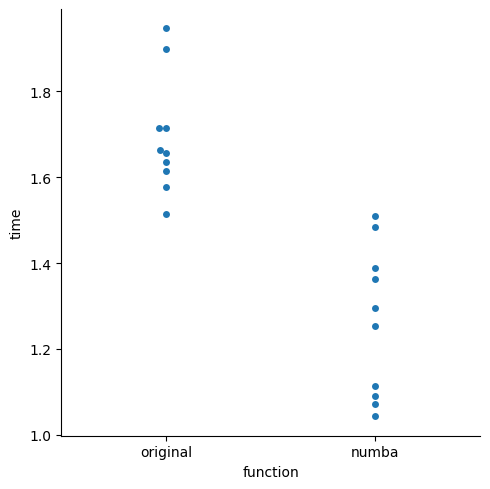

In [13]:
_ = sns.catplot(data=df_melt, x="function", y="time", kind="swarm")

# What kind of analysis?


In [14]:
egraph = EGraph([array_api_module])
_NDArray_1 = NDArray.var("X")
assume_dtype(_NDArray_1, DType.float64)

egraph.register(DType.float64 == _NDArray_1.dtype)
egraph.saturate()

In [15]:
assume_shape(_NDArray_1, TupleInt(Int(1000000)))
egraph = EGraph([array_api_module])
egraph.register(reshape(_NDArray_1, (-1,)).ndim == Int(1))
egraph.saturate()

In [16]:
# rule(
#     greater_zero(v),
#     greater_zero(v1),
#     eq(v2).to(v / v1),
# ).then(
#     greater_zero(v2),
# )
egraph = EGraph([array_api_module])
egraph.register(  # Interval analysis
    any((unique_counts(NDArray.var("X"))[1] / 1000000.0) < 0)
)
egraph.saturate()

# Egglog can open a door to PL in Python

- Meet users where they are at
- Introduce new abstractions to improve performance and interoperability between libraries


-
- So whats the point?
  - all this mechanisms basically let us open a door
  - to do symbolic evaluate
  - bring formal methods into Python
  - If this can be a way to get research into the field
    - people arent going to use haskell, not write in coq,
    - they wont even use try a new python library
    - but, if all it takes is an import, and their code will go faster?
      - or they can target new hardware
      - thats compelling


# Future work

Can we implement this journey in egglog?

```
Python bytecode
    -> RSVDG
        -> abstract analysis of program state/effects ~Interaction Trees
            -> Functional domains (a Mathematics of Arrays/APL)
        <- Flatten arrays
    <- Polyhedral forms/loop nests
GPU/LLVM code
```

Can this abstract interpretation, using a System F type system, and rewrite rules, serve as a way to communicate between these different domains?

What about studying the correctness properties of these rewrite rules and semantics?


- Lenore mullin APL
  - functional representation of arrays
  - TODO quote from python mailing lists?
- For example, what if we move the bytecode analysis numba does into this frame?
  - imperative -> functional code
  - RSVDG - start to use this work
  - maybe we could also use different models, from IT
    - take imperative code, lift into form to analyze the semantics, and optimize it
    - closer to a semantics
- Let us express these different more abstract semantic domains, and go back and forth between those and imperative levels, of Python, of Array APIs
  - IF/when its working I would love to start exploring quesitons on the meta framework - like is the Systme F type system enough to represent all of this? - How can we prove properties of our system based on the rewrite rules?


# Conclusion

- Python open source ecosystem needs more precise abstractions for building ecosystem of DSLs
- Space for PL research to have a huge impact and lots of interesting mathematical problems

Thank you!

- Saul Shanabrook
- [https://github.com/egraphs-good/egglog-python](https://github.com/egraphs-good/egglog-python)


- Before we can even begin to experiment here, we have to build up all this machinery
  - there is no compiler pass to add to Python
  - Either we have to fork the language, or do it through EDSLS
  - the latter seems more diverse, more fun, more collaborative
    - share horizontally
  - In a way, it's a political question, that if we can add these ways to creating abstraction in Python, allows different ways of orienting social groups
- work with numba team to use egglog to allow third party authors to add their own abstractions to the compiler that are erased
  - democratizing a compiler
  - rewrite rules that are much more readable than many other libraries
  - very mathametical
  - open up space for more people
- This is a way of bringing PL research into high impact field

  - if we are to deliver here we also need to show it can work
  - I am applying for PhD programs to help this collaboration
  - I am familair with PyData ecosystem
  - need egglog to work
    - open research wquestions
  - need optimizations to work, need to have the right abstractions to store these things in a functional form

    - theory needs to hold up its of the bargain
